# Air Quality Classifier

### 1) Problem Statement

- This project understands how the quality of air is affected by other variables such as Temperature , Humidity, and Wind Speed.

### 2) Data Collection

- Dataset Source : [Kaggle](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment)
- Dataset consists of 10 columns and 5000 rows.

#### 2.1) Importing data and libraries

##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/air_quality_metrics.csv')

In [3]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
df.shape

(5000, 10)

#### 2.2) Dataset Information

- Temperature (°C): Average temperature of the region.
- Humidity (%): Relative humidity recorded in the region.
- PM2.5 Concentration (µg/m³): Fine particulate matter levels.
- PM10 Concentration (µg/m³): Coarse particulate matter levels.
- NO2 Concentration (ppb): Nitrogen dioxide levels.
- SO2 Concentration (ppb): Sulfur dioxide levels.
- CO Concentration (ppm): Carbon monoxide levels.
- Proximity to Industrial Areas (km): Distance to the nearest industrial zone.
- Population Density (people/km²): Number of people per square kilometer in the region.

### 3) Data Check to Perform

- Check Missing Values
- Check for duplicates
- Check data type
- Check statistics of dataset
- Check number of unique values of each column
- Createing some important features

#### 3.1) Check Missing Values

In [5]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

There are no missing values

#### 3.2) Check duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates

#### 3.3) Check data type

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


There are 9 numerical features and 1 categorical feature

#### 3.4) Check statistics of dataset

In [8]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


#### 3.5) Check unique number of values

In [9]:
df.nunique()

Temperature                      362
Humidity                         723
PM2.5                            815
PM10                             955
NO2                              445
SO2                              348
CO                               265
Proximity_to_Industrial_Areas    179
Population_Density               683
Air Quality                        4
dtype: int64

#### 3.6) Creating some important features from available dataset

- Calculating weighted pollution using following formula:
Weighted_pollution = 0.4(PM2.5) + 0.3(PM10) + 0.2(NO2) + 0.1(SO2)

In [10]:
df["weighted_pollution"] = 0.4 * df["PM2.5"] + 0.3 * df["PM10"] + 0.2 * df["NO2"] + 0.1 * df["SO2"]

In [11]:
df["weighted_pollution"].describe()

count    5000.000000
mean       23.406266
std        18.934230
min         3.940000
25%        11.177500
50%        17.530000
75%        28.622500
max       223.310000
Name: weighted_pollution, dtype: float64

- Calculating pm_ratio using following formula:
PM_FINE_RATIO = PM2.5/PM10

In [12]:
df["pm_fine_ratio"] = df["PM2.5"]/df["PM10"]

In [13]:
df["pm_fine_ratio"].describe()

count    5000.000000
mean             inf
std              NaN
min        -2.000000
25%         0.361529
50%         0.593179
75%         0.756638
max              inf
Name: pm_fine_ratio, dtype: float64

- Calculating population exposure using formula:
POPULATION_EXPOSURE = population_density (pm2.5+pm10+so2+no2+co)

In [14]:
df["population_exposure"] = df["Population_Density"] * ( df["PM2.5"] + df["PM10"] + df["SO2"] + df["NO2"] + df["CO"] )

In [15]:
df["population_exposure"].describe()

count      5000.000000
mean      47723.716746
std       42857.160552
min        4311.620000
25%       19706.497500
50%       34228.040000
75%       60963.557500
max      511542.840000
Name: population_exposure, dtype: float64

### 4) Data Exploration

<Axes: xlabel='PM2.5', ylabel='PM10'>

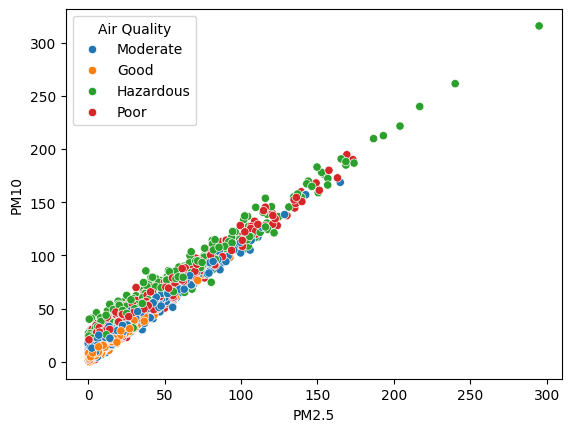

In [28]:
sns.scatterplot(x=df['PM2.5'], y=df["PM10"],hue=df['Air Quality'])

<Axes: xlabel='SO2', ylabel='NO2'>

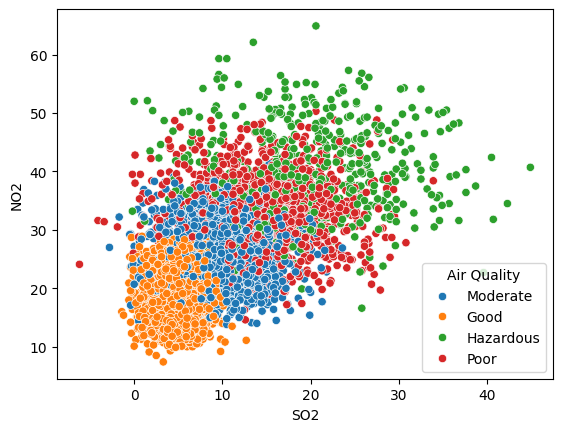

In [17]:
sns.scatterplot(x=df["SO2"], y=df["NO2"],hue=df['Air Quality'])

<Axes: xlabel='Temperature', ylabel='Humidity'>

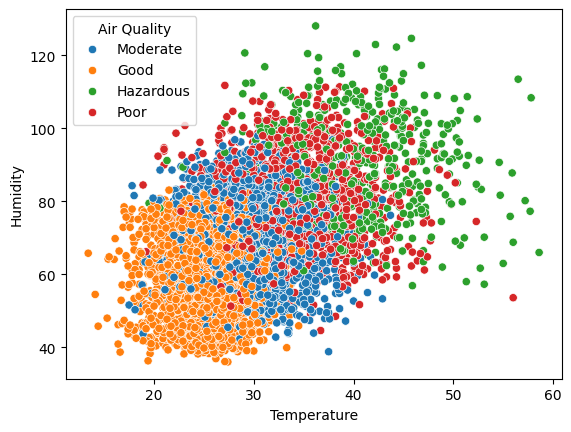

In [18]:
sns.scatterplot(x=df['Temperature'],y=df['Humidity'],hue=df["Air Quality"])

In [19]:
import plotly.graph_objects as go

In [20]:
# Map Air Quality Levels to colors (directly, without modifying the DataFrame)
color_map = {
    "Good": "green",
    "Moderate": "yellow",
    "Poor": "orange",
    "Hazardous": "red"
}
colors = [color_map[label] for label in df["Air Quality"]]

In [24]:
# import plotly.io as pio
# pio.renderers.default = "browser"

# Create 3D scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df["CO"], 
    y=df["NO2"], 
    z=df["SO2"], 
    mode='markers',
    marker=dict(
        size=8,
        color=colors,  # Pass color list directly
        opacity=0.8
    ),
    text=df.apply(lambda row: f"CO: {row['CO']}<br>NO2: {row['NO2']}<br>SO2: {row['SO2']}<br>Air Quality: {row['Air Quality']}", axis=1),
    hoverinfo="text"
))

# Update layout
fig.update_layout(
    scene=dict(
        xaxis_title='CO (ppm)',
        yaxis_title='NO2 (ppb)',
        zaxis_title='SO2 (ppb)'
    ),
    title="Interactive 3D Visualization of Air Quality Levels",
    margin=dict(l=0, r=0, b=0, t=50)
)

# Show plot
fig.show()

<Axes: xlabel='Air Quality', ylabel='Temperature'>

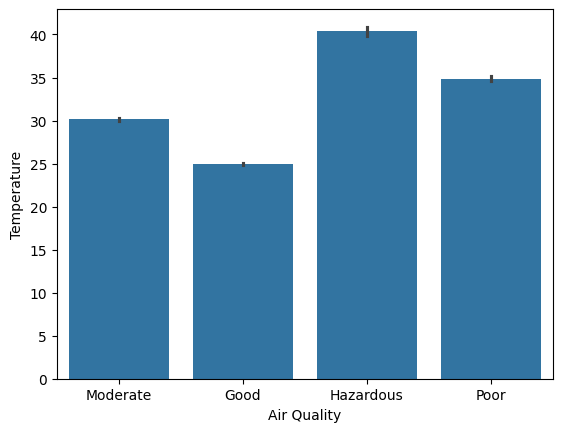

In [27]:
sns.barplot(x=df['Air Quality'], y=df['Temperature'])

<Axes: xlabel='NO2', ylabel='Temperature'>

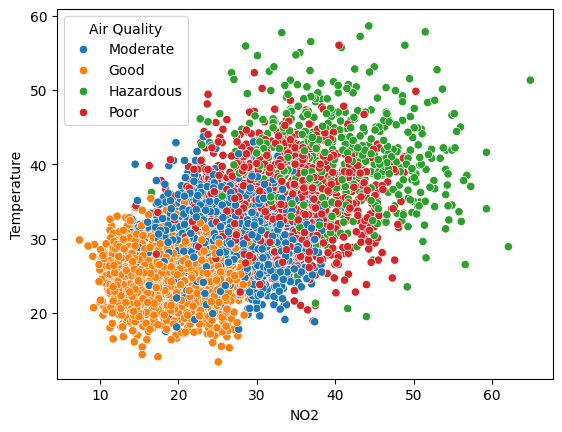

In [31]:
sns.scatterplot(x=df['NO2'],y=df['Temperature'],hue=df['Air Quality'])

<Axes: xlabel='SO2', ylabel='Temperature'>

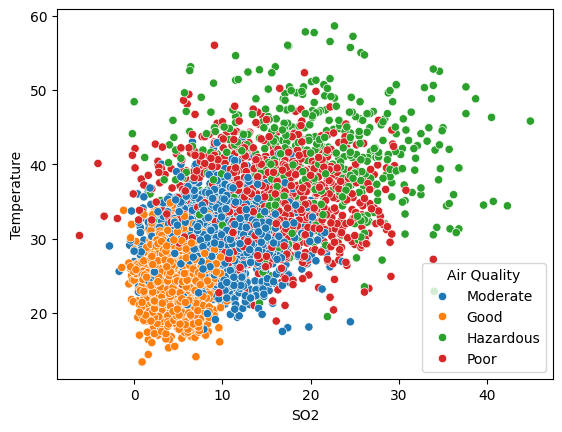

In [32]:
sns.scatterplot(x=df['SO2'],y=df['Temperature'],hue=df['Air Quality'])

<Axes: xlabel='CO', ylabel='Temperature'>

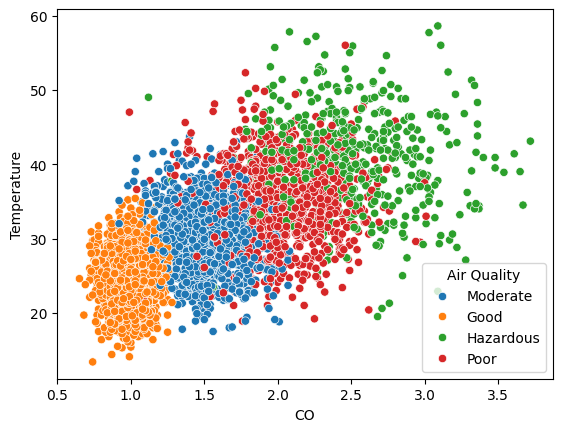

In [33]:
sns.scatterplot(x=df['CO'],y=df['Temperature'],hue=df['Air Quality'])

##### INSIGHTS
- The quality of air is severely danger where the temperature is high as compared to that of region with low temperature having good air quality

- Higher the temperaute higer the humidity showing kind of linear relationship summing up this is the reason why the air quality is bad in the region with high temperature.

- the realtion between pm2.5 and pm10 is also linear but there is strange relation between this two and air quality because though the both value are low the air quality is hazardous showing low correlation among air quality and (pm 2.5 and pm10).

- the 3d plot above shows us the relation between concentration of different gases and air quality which shows us the very high relation among gasous concentration and air quality. We can see that as the gasous concentration increases the air quality decreases.

- We can also see the relation between different gases and temperature which show us the very high temperature is the reason behind the bad air quality in the region.

- so the conclusion is: high gasous concentration results in high temperature and humidity which results in bad air quality.


In [35]:
df.to_csv('data/air_quality_metrics.csv', index=False)